In [77]:
import tensorflow as tf
print(tf.__version__)

2.2.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [78]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [79]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

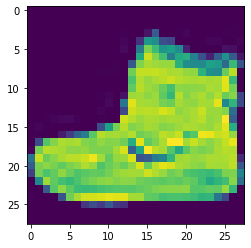

In [80]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [81]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

1 set of data for training, and then another set of data.

In [82]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


now the model is defined, is to actually build it.
 ,compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels

In [83]:
model1.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [84]:
model1.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4980 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3757 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3369 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2936 - accuracy: 0.8915


In [85]:
model1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         multiple                  0         
_________________________________________________________________
dense_48 (Dense)             multiple                  100480    
_________________________________________________________________
dense_49 (Dense)             multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [86]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8737


[0.35802337527275085, 0.8737000226974487]

In [87]:
print(classifications[0])
print(test_labels[0])

[5.2930831e-13 1.1154566e-14 1.7490649e-22 5.4414862e-12 3.6942331e-23
 4.7390897e-02 2.2794353e-15 3.6582679e-01 2.0924610e-12 5.8678240e-01]
9


 a accuracy of about 0.8640, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data.

Hence we are exploring more into models


##Model 2: 

Experiment with different values for the dense layer with 1024 neurons.


In [88]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)


2.2.0
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4715
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3571
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3219
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2959
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3558


In [89]:
print(classifications[0])
print(test_labels[0])

[9.00048326e-06 1.43315631e-07 3.56441916e-08 1.23827775e-08
 2.14075619e-08 1.89010217e-03 1.46025468e-06 1.92931667e-02
 2.10423806e-07 9.78805840e-01]
9


By adding more Neurons we have to do more calculations, slowing down the process

##Model 3: 

Experiment with different values for the dense layer with 64 neurons.



In [90]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)


2.2.0
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5181
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3924
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3530
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3289
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3817


In [91]:
print(classifications[0])
print(test_labels[0])

[2.9204359e-06 9.5286294e-09 3.1857036e-07 2.3686187e-08 2.4464453e-07
 1.0673149e-02 1.7717641e-05 5.9560509e-03 3.2893720e-05 9.8331660e-01]
9


##Model4: 

effects of additional layers in the network.
adding another layer between the one with 512 and the final layer with 10. 
 

In [92]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)



2.2.0
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4666
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3532
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3182
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2973
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3367


In [93]:
print(classifications[0])
print(test_labels[0])

[7.5596887e-07 1.8511606e-06 2.6455865e-07 1.8227209e-07 2.3482225e-07
 3.0809443e-03 1.5994706e-06 9.3158316e-03 1.7748403e-05 9.8758054e-01]
9


#Exercise 6: 


 15 epochs -- you'll probably get a model with a much better loss than the one with 5
 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting'

In [94]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

2.2.0
Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4998
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3136
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2553
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2383
Epoch 11/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2314
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.

In [95]:
print(classifications[0])
print(test_labels[0])

[7.1378792e-10 1.9788602e-15 2.0054274e-11 7.0037691e-11 2.5139644e-11
 1.3837825e-07 1.1453699e-08 6.1858242e-05 1.5267841e-11 9.9993801e-01]
9


#Model6: 

without normalization 

In [96]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

2.2.0
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.3415
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5423
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5052
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4973
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5260


In [97]:
print(classifications[0])
print(test_labels[0])

[1.8771786e-09 3.1367349e-09 6.8934421e-16 5.6156879e-10 9.0396508e-15
 3.0149281e-02 3.0377075e-12 1.6231631e-01 2.1032077e-08 8.0753446e-01]
9


#Model7: 

Early stopping 

In [98]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

2.2.0


In [99]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

In [100]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [101]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4736 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3593 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3224 - accuracy: 0.8808
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3016 - accuracy: 0.8876
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8955
Epoch 6/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.2663 - accuracy: 0.9007
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9007
